In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
filepath = "iot23_sequential_malicious.csv"
df_malicious = pd.read_csv(filepath)

In [4]:
filepath = "iot23_sequential_benign.csv"
df_benign = pd.read_csv(filepath)

In [5]:
df = pd.concat([df_benign, df_malicious])

In [6]:
df_malicious

,Unnamed: 0,shift_id.orig_p_1,shift_id.resp_p_1,shift_duration_1,shift_orig_bytes_1,shift_resp_bytes_1,shift_missed_bytes_1,shift_orig_pkts_1,shift_orig_ip_bytes_1,shift_resp_pkts_1,...,shift_conn_state_RSTOS0_20,shift_conn_state_RSTR_20,shift_conn_state_RSTRH_20,shift_conn_state_S0_20,shift_conn_state_S1_20,shift_conn_state_S2_20,shift_conn_state_S3_20,shift_conn_state_SF_20,shift_conn_state_SH_20,shift_conn_state_SHR_20
0,23,51524.0,23.0,0.000000,0,0,0.0,1.0,60.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,52702.0,2323.0,2.999068,0,0,0.0,3.0,180.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,60905.0,23.0,0.000000,0,0,0.0,1.0,60.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,40485.0,8080.0,2.998813,0,0,0.0,3.0,180.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,39813.0,23.0,0.000000,0,0,0.0,1.0,60.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246840,99994,60039.0,23.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1246841,99995,41762.0,23.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1246842,99996,58758.0,23.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1246843,99997,40400.0,23.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_benign

,Unnamed: 0,shift_id.orig_p_1,shift_id.resp_p_1,shift_duration_1,shift_orig_bytes_1,shift_resp_bytes_1,shift_missed_bytes_1,shift_orig_pkts_1,shift_orig_ip_bytes_1,shift_resp_pkts_1,...,shift_conn_state_RSTOS0_20,shift_conn_state_RSTR_20,shift_conn_state_RSTRH_20,shift_conn_state_S0_20,shift_conn_state_S1_20,shift_conn_state_S2_20,shift_conn_state_S3_20,shift_conn_state_SF_20,shift_conn_state_SH_20,shift_conn_state_SHR_20
0,120,43763.0,15976.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121,123.0,123.0,0.001239,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,124,43763.0,798.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,125,3.0,1.0,3.000055,180,0,0.0,3.0,264.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,127,43763.0,40527.0,0.000000,0,0,0.0,1.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192074,10388,123.0,123.0,0.004995,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192075,10391,123.0,123.0,0.001736,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192076,10392,123.0,123.0,0.005985,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192077,10398,123.0,123.0,0.005227,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
del df['Unnamed: 0']
del df_malicious['Unnamed: 0']
del df_benign['Unnamed: 0']

In [9]:
df = df.values
df_malicious = df_malicious.values
df_benign = df_benign.values

print(df_malicious.shape)
print(df_benign.shape)

(1246845, 520)
(192079, 520)


In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(df_malicious)

MinMaxScaler()

In [12]:
normalized_malicious = scaler.transform(df_malicious)

In [13]:
normalized_malicious.shape

(1246845, 520)

In [14]:
normalized_benign = scaler.transform(df_benign)

In [15]:
normalized_benign.shape

(192079, 520)

In [16]:
df_malicious_t = normalized_malicious.reshape(normalized_malicious.shape[0], 20, 26)
df_benign_t = normalized_benign.reshape(normalized_benign.shape[0], 20, 26)

print(df_malicious_t.shape)
print(df_benign_t.shape)

(1246845, 20, 26)
(192079, 20, 26)


In [17]:
df_malicious_t = np.append(df_malicious_t, np.zeros((len(df_malicious_t),len(df_malicious_t[0]),1)), axis=2)

In [18]:
df_benign_t = np.append(df_benign_t, np.ones((len(df_benign_t),len(df_benign_t[0]),1)), axis=2)

In [19]:
df_malicious_t.shape

(1246845, 20, 27)

In [20]:
df_benign_t.shape

(192079, 20, 27)

In [21]:
np_dataset = np.vstack([df_malicious_t, df_benign_t])

print(np_dataset.shape)

(1438924, 20, 27)


In [22]:
x_data = np_dataset[:,:,:-1]
labels = np_dataset[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1438924, 20, 26)
(1438924,)


In [23]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=2)
y_data.shape

(1438924, 2)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, random_state=10, test_size=0.2)

In [25]:
print(X_train.shape, Y_train.shape) # 학습데이터 및 정답레이블
print(X_test.shape, Y_test.shape) #검증데이터 및 정답레이블

(1151139, 20, 26) (1151139, 2)
(287785, 20, 26) (287785, 2)


In [26]:
model = Sequential()

In [29]:
model.add(GRU(units=64, activation='relu', input_shape=X_train.shape[1:3], return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                17664     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 19,810
Trainable params: 19,810
Non-trainable params: 0
_________________________________________________________________


In [31]:
import time

In [32]:
start = time.time()
print('program start...')
print()

history = model.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size=1024, 
    validation_data=(X_test,Y_test),
    verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/10
1125/1125 [==============================] - 53s 45ms/step - loss: 0.1843 - accuracy: 0.9178 - val_loss: 0.1474 - val_accuracy: 0.9264
Epoch 2/10
1125/1125 [==============================] - 45s 40ms/step - loss: 0.1497 - accuracy: 0.9263 - val_loss: 0.1503 - val_accuracy: 0.9268
Epoch 3/10
1125/1125 [==============================] - 47s 42ms/step - loss: 0.1440 - accuracy: 0.9282 - val_loss: 0.1415 - val_accuracy: 0.9254
Epoch 4/10
1125/1125 [==============================] - 47s 42ms/step - loss: 0.1540 - accuracy: 0.9273 - val_loss: 0.1407 - val_accuracy: 0.9280
Epoch 5/10
1125/1125 [==============================] - 48s 43ms/step - loss: 0.1428 - accuracy: 0.9274 - val_loss: 0.1394 - val_accuracy: 0.9280
Epoch 6/10
1125/1125 [==============================] - 48s 42ms/step - loss: 0.1400 - accuracy: 0.9291 - val_loss: 0.1362 - val_accuracy: 0.9321
Epoch 7/10
1125/1125 [==============================] - 50s 44ms/step - loss: 0.1362 - accuracy: 0.9314 - 

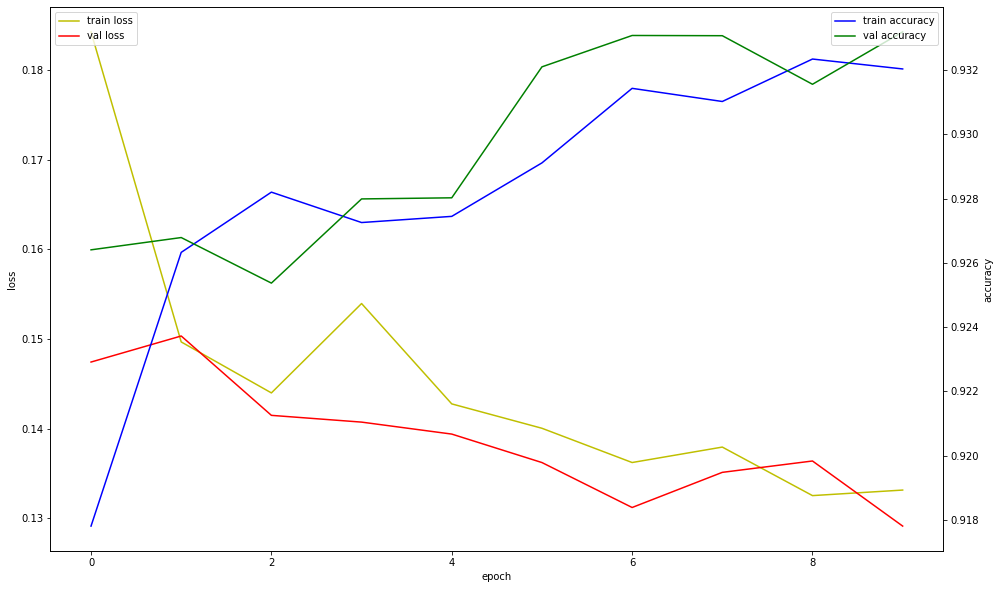

In [33]:
fig, loss_ax = plt.subplots(figsize = (16,10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
new_model = tf.keras.models.load_model('model.h5')

In [ ]:
Y_test.shape

(327347, 2)

In [ ]:
X_test.shape

(327347, 20, 26)

In [ ]:
test_loss, test_acc = new_model.evaluate(X_test, Y_test, verbose=1)

10230/10230 [==============================] - 18s 2ms/step - loss: 0.1670 - accuracy: 0.9203


In [ ]:
y_pred = new_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets